# Evaluating iterative algorithms


Many generative methods (e.g., genetic algorithms) iteratively explore sequences to improve sequence fitness. One may be interested in visualizing the improvement across iterations/generations. Here we show how to evaluate sequences optimized across multiple rounds using seqme.


In [ ]:
import seqme as sm

## Single run


seqme allows naming sequence entries as a tuple. Here we name an entry using the following format: (model name, iteration).


In [ ]:
sequences = {
    ("model 1", 1): ["QLF", "FFQLL", "RQLL"],
    ("model 1", 2): ["RQLF", "PRFQRP", "RQLL"],
    ("model 1", 3): ["RQLRR", "RQLRRR", "RQLRRR"],
    ("model 2", 1): ["QLF", "QLF", "RQLL"],
    ("model 2", 2): ["QLF", "FFQRP", "RQLL"],
    ("model 2", 3): ["PLFR", "RFQRP", "RQLR"],
}

Let's define the metrics to compute.


In [ ]:
metrics = [
    sm.metrics.ID(predictor=sm.models.Charge(), name="Charge", objective="maximize"),
    sm.metrics.Uniqueness(),
]

Let's compute the metrics.


In [ ]:
df = sm.evaluate(sequences, metrics)

100%|██████████| 12/12 [00:00<00:00, 877.07it/s, data=('model 2', 3), metric=Uniqueness]


In [ ]:
sm.show(df, color_style="bar", caption="Table 1. Iterative algorithms")

Let's highlight it differently.


In [ ]:
sm.show(df, color_style="bar", caption="Table 1. Iterative algorithms", level=1)

Notice in the above table visualization, we set `level=1`, this means that each sub metric dataframe (model 1 and model 2) should be colored, underlined and bolded, independently.


Let's visualize the sequences performance at each step.


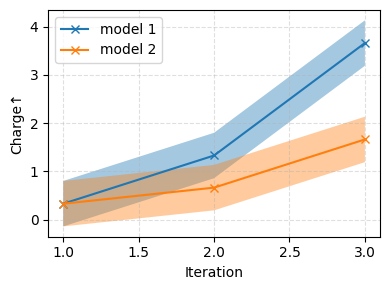

In [ ]:
sm.plot_series(df, "Charge")

Let's sort the sequences by their charge.


In [ ]:
df2 = sm.sort(df, "Charge", level=0)
sm.show(df2, caption="Table 2.1. Iterative algorithms (sorted)", color_style="bar", hline_level=0)

,,Charge↑,Uniqueness↑
model 1,3,3.66±0.47,0.67
model 2,3,1.66±0.47,1.00
model 1,2,1.33±0.47,1.00
model 2,2,0.66±0.47,1.00
model 1,1,0.33±0.47,1.00
model 2,1,0.33±0.47,0.67


Let's rearrange the entries levels and sort the sequence by uniqueness within each iteration.


In [ ]:
df3 = df.reorder_levels([1, 0])
df3 = sm.sort(df3, "Uniqueness", level=1)

sm.show(
    df3, color="#d668c9", caption="Table 2.2. Iterative algorithms (sorted within iteration)", color_style="gradient"
)

Let's display the sequences with largest charge in each iteration.


In [ ]:
df4 = df.reorder_levels([1, 0]).sort_index()
df4 = sm.top_k(df4, "Charge", k=1, level=1)
sm.show(df4, color_style="bar", hline_level=0, caption="Table 2.3. Best per iteration")

## Multiple runs


Let's assume we ran two generative models multiple times with a different seed each time. The sequences from the runs are shown below. And now we want to compute the deviation in performance across runs.


In [ ]:
sequences_run1 = {
    ("model 1", 1): ["QLF", "FFQLL", "RQLL"],
    ("model 1", 2): ["RQLF", "PRFQRP", "RQLL"],
    ("model 1", 3): ["RQLRR", "RQLRRR", "RQLRRR"],
    ("model 2", 1): ["QLF", "FFQRP", "RQLL"],
    ("model 2", 2): ["QLF", "FFQRP", "RQLL"],
    ("model 2", 3): ["PLFR", "RFQRP", "RQLR"],
}

sequences_run2 = {
    ("model 1", 1): ["QLF", "FFQLL", "RQLL"],
    ("model 1", 2): ["RQLF", "PRFQRP", "RQLL"],
    ("model 1", 3): ["RQLRR", "RQLRRR", "RQLRRR"],
    ("model 2", 1): ["QLF", "FFQRP", "RQLL"],
    ("model 2", 2): ["QLF", "FFQRP", "RQLL"],
    ("model 2", 3): ["PLFR", "RFQRP", "RQLR"],
}

sequences_run3 = {
    ("model 1", 1): ["RQLF", "PRFQRP", "RQLL"],
    ("model 1", 2): ["QLF", "FFQLL", "RQLL"],
    ("model 1", 3): ["RQLRR", "RQLRRR", "RQLRRR"],
    ("model 2", 1): ["QLF", "FFQRP", "RQLL"],
    ("model 2", 2): ["QLF", "FFQRP", "RQLL"],
    ("model 2", 3): ["PLFR", "RFQRP", "RQLR"],
}

sequences_per_run = [sequences_run1, sequences_run2, sequences_run3]

Let's define the metrics to compute.


In [ ]:
metrics = [
    sm.metrics.ID(predictor=sm.models.Charge(), name="Charge", objective="maximize"),
    sm.metrics.Uniqueness(),
]

In [ ]:
df_per_run = [sm.evaluate(sequences, metrics) for sequences in sequences_per_run]

100%|██████████| 12/12 [00:00<00:00, 1737.07it/s, data=('model 2', 3), metric=Uniqueness]


Let's create a metric dataframe combining the metric dataframe of each run.


In [ ]:
df_combined_runs = sm.combine(df_per_run, on_overlap="mean,std")

In [ ]:
sm.show(df_combined_runs, color="#6892d6", color_style="bar", caption="Table 3. Multiple runs")

Let's visualize the sequences performance at each iteration.


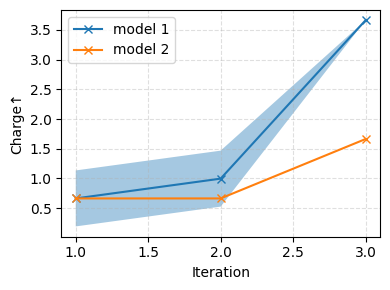

In [ ]:
sm.plot_series(df_combined_runs, "Charge")